<a href="https://colab.research.google.com/github/albivaltzew/NLP_CV_DC_ITMO/blob/main/Unit_9_opencv_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Обзор возможностей OpenCV

OpenCV — библиотека компьютерного зрения и машинного обучения с открытым исходным кодом. Библиотека имеет интерфейсы на различных языках: Java, C++, Matlab и, конечно, Python. 

<a href='https://readthedocs.org/projects/opencv-python-tutroals/downloads/pdf/latest/' target='_blank'>Здесь</a> можно ознакомиться с официальной документацией и примерами.

## Установка OpenCV

In [ ]:
!pip install opencv-python==4.4.0.42

You should consider upgrading via the '/Users/romanov/_dev/Anaconda/anaconda3/bin/python -m pip install --upgrade pip' command.


После успешной установки, перезагрузите ядро и убедитесь, что используется версия 4.4.0

In [ ]:
import cv2
print('OpenCV version:', cv2.__version__)

OpenCV version: 4.4.0


## Палитра, каналы

Для отображения изображений в блокноте, будем использовать библиотеку matplotlib:

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Создадим каталог img и поместим в него изображение

In [ ]:
path = 'img/'
file_name = 'alisa-olaivar-5bjgzAPKzpI-unsplash.jpg'

С помощью команды cv2.imread() выполним чтение изображения

In [ ]:
img = cv2.imread(path + file_name)

Объект img является массивом типа ndarray, что позволяет с легкостью выполнять различные операции с ним и, как следствие, с изображением. Рассмотрим его структуру

In [ ]:
print(type(img))
print(img.shape)

<class 'numpy.ndarray'>
(3372, 5097, 3)


Итак, размерность массива (3372, 5097, 3). Первые два числа отвечают за разрешение изображения. Первое число, 3372 — высота изображения в пикселях (или количество строк в массиве), второе число, 5097 — ширина (или количество столбцов). Третье значение указывает на информацию, которая содержится о каждом пикселе. В данном случае (для цветного изображения в формате RGB) мы имеем дело с интенсивностью соответствующих каналов.

Давайте выведем изображение, хранимое в виде массива, на экран. Для этого используем команду imshow():

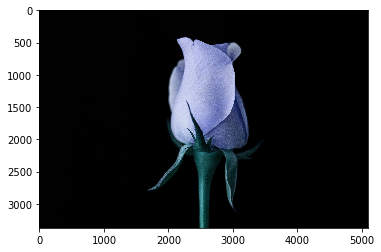

In [ ]:
plt.imshow(img)
plt.show()

Если сравнить исходное изображение и то, что отобразилось выше, можно заметить некоторое несоответствие по цветам.

<b>Важно!</b> Отметим на этом этапе два важных замечания. Во-первых, изображение по умолчанию представляется в обратной палитре BGR, а не привычной RGB. Для корректного отображения, необходимо поменять каналы R и B местами. Во-вторых, разрешение изображения считается от верхнего левого угла (можно заметить соответствующую систему координат).

Поменять каналы R и B можно вручную, но куда проще воспользоваться следующей встроенной функцией:

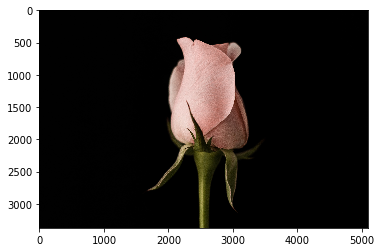

In [ ]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)
plt.show()

Большинство команд, возвращает кортеж значений, так что для удобства рекомендуем пользоваться следующим синтаксисом:

In [ ]:
h, w, c = img.shape
print('Width:  ', w)
print('Height: ', h)
print('Channels:', c)

Width:   5097
Height:  3372
Channels: 3


In [ ]:
B, G, R = img[774][2500]
print('Red channel:', R)
print('Green channel: ', G)
print('Blue channel:  ', B)

Red channel: 226
Green channel:  183
Blue channel:   177


И не забывайте, в какой палитре сохранено изображение, так как это влияет на порядок значений!

In [ ]:
R, G, B = RGB_img[774][2500]
print('Red channel:', R)
print('Green channel: ', G)
print('Blue channel:  ', B)

Red channel: 226
Green channel:  183
Blue channel:   177


Обращаясь к определенным каналам пикселей, мы можем изменить их интенсивность. Например обнулить каналы R и B:

In [ ]:
import numpy as np

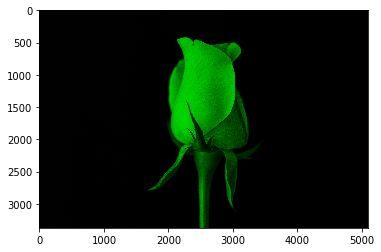

In [ ]:
green_img = RGB_img.copy()

green_img[:, :, 0] = 0 
green_img[:, :, 2] = 0

plt.imshow(green_img)
plt.show()

Или установить интенсивность канала R для всех пикселей, равной 250:

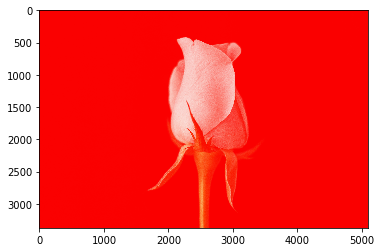

In [ ]:
red_intense_img = RGB_img.copy()

red_intense_img[:, :, 0] = 250

plt.imshow(red_intense_img)
plt.show()

## Изменение изображения (обрезка, сжатие, вращение)

Так как изображение представляет собой массив, то для операции обрезки изображения достаточно просто обратиться к нужному диапазону пикселей.

Следущий код выделяет область изображения с 300 по 3200 пиксель по вертикали (не забывайте, что 0 находится сверху, а нумерация начинается с нуля) и с 1500 по 3500 по горизонтали:

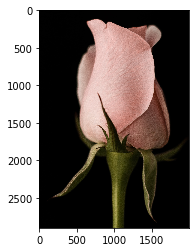

In [ ]:
crop_img = RGB_img[300:3200, 1500:3500]
plt.imshow(crop_img)
plt.show()

Для масштабирования или сжатия изображения можно воспользоваться функцией resize(), которая в качестве параметров принимает исходное изображение и новую размерность в пикселях. Кроме того, можно указать алгоритм преобразования. Ознакомиться с различными алгоритмы и математикой, скрытой за ними, можно в <a href='https://docs.opencv.org/trunk/da/d6e/tutorial_py_geometric_transformations.html' target='_blank'>документации</a>.

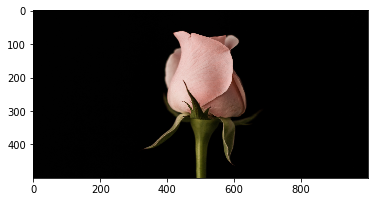

In [ ]:
dim = (1000, 500)
resized_RGB_img = cv2.resize(RGB_img, dim, interpolation = cv2.INTER_AREA)
plt.imshow(resized_RGB_img)
plt.show()

Размеры изображения изменены на 1000 пикселей в ширину и 500 пикселей в высоту, что конечно привело к нарушению пропорций.
Для сохранения пропорций следует найти отношение исходных сторон:

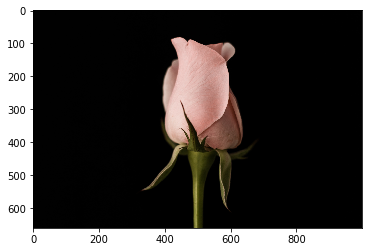

In [ ]:
h, w, c = RGB_img.shape
new_width = 1000

k = float(w) / h
dim = (new_width, int(new_width / k))

resized_RGB_img = cv2.resize(RGB_img, dim, interpolation = cv2.INTER_AREA)
plt.imshow(resized_RGB_img)
plt.show()

И, наконец, последнее базовое преобразование — поворот изображения. Для этого необходимо создать матрицу поворота на заданный угол. Положительным значениям соответствует поворот против часовой стрелки, отрицательным — по часовой. Поворот, конечно же, задается относительной некоторой точки. 

Повернем изображение на 45 градусов по часовой стрелке относительно (почти) центра. За создание матрицы поворота отвечает функция getRotationMatrix2D(), а за преобразование — функция warpAffine().

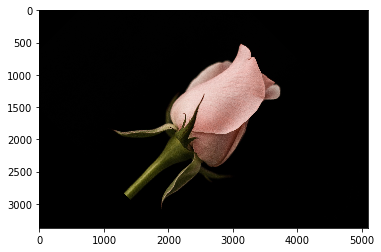

In [ ]:
h, w, c = RGB_img.shape
center = (w // 2, h // 2) 
M = cv2.getRotationMatrix2D(center, -45, 1)
rotated_RGB_img = cv2.warpAffine(RGB_img, M, (w, h))

plt.imshow(rotated_RGB_img)
plt.show()

Во время поворота можно масштабировать изображение, за это отвечает последний параметр функции getRotationMatrix2D().

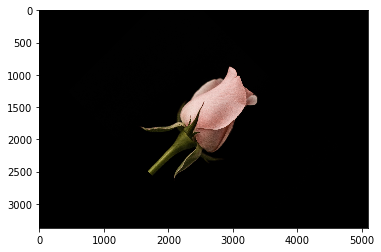

In [ ]:
h, w, c = RGB_img.shape
center = (w // 2, h // 2) 
M = cv2.getRotationMatrix2D(center, -45, 0.7)
rotated_RGB_img = cv2.warpAffine(RGB_img, M, (w, h))

plt.imshow(rotated_RGB_img)
plt.show()

## Еще о палитрах

Мы уже немного поговорили о палитрах и научились преобразовывать изображения из BGR в RGB. Полезной палитрой при реализации моделей компьютерного зрения является серая шкала (градации серого). Такая шкала передает 256 оттенков серого цвета, или яркости (значение 0 представляет черный цвет, а значение 255 — белый).

Для преобразования из формата BGR воспользуемся методом COLOR_BGR2GRAY:

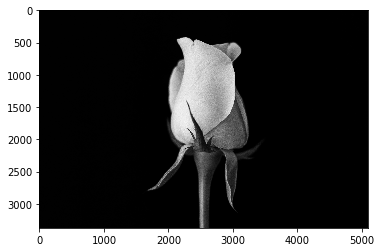

In [ ]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.show()

Забегая несколько вперед, такая палитра полезна в контексте определения границ объектов. Например, с помощью функции threshold, мы можем изменить интенсивность пикселей, которые темнее (меньше) некоторого порога и, соответственно, ярче (больше).

Например, заменим все пиксели темнее, чем 127, на 0, а все, которые ярче 127, — 
на 255.

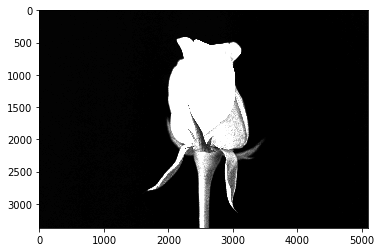

In [ ]:
ret, thresh_image = cv2.threshold(gray_image, 127, 255, 10)
plt.imshow(thresh_image, cmap='gray')
plt.show()

В итоге, цветок имеет очень четкую границу с фоном, и может быть в последствии определен на изображении.

Ниже приведем еще некоторые примеры:

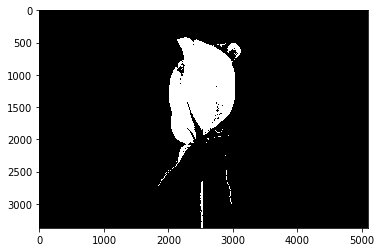

In [ ]:
ret, thresh_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
plt.imshow(thresh_image, cmap='gray')
plt.show()

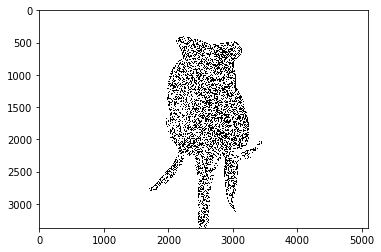

In [ ]:
th2 = cv2.adaptiveThreshold(gray_image,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
plt.imshow(th2, cmap='gray')
plt.show()

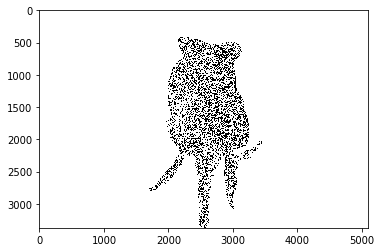

In [ ]:
th3 = cv2.adaptiveThreshold(gray_image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
plt.imshow(th3, cmap='gray')
plt.show()

## Сохранение изображений

Все созданные изображения, конечно, можно сохранить, для этого воспользуемся командой imwrite(). В качестве параметров указываем путь с именем файла и переменную, в которой хранится изображение.

In [ ]:
path = ''
file_name = 'gray_image.jpg'

cv2.imwrite(path + file_name, gray_image)

True

Также обращаем внимание, что при сохранении цветного изображения, функция imwrite() ожидает его в формате BGR.

In [ ]:
path = ''
file_name = 'temp.jpg'

cv2.imwrite(path + file_name, cv2.cvtColor(RGB_img, cv2.COLOR_RGB2BGR))

True